## Final Project Submission

Please fill out:
* Student name: Karen Amanya
* Student pace: part time 
* Scheduled project review date/time: 14th December 2022
* Instructor name: 
* Blog post URL:


# Predicting House Prices in King County

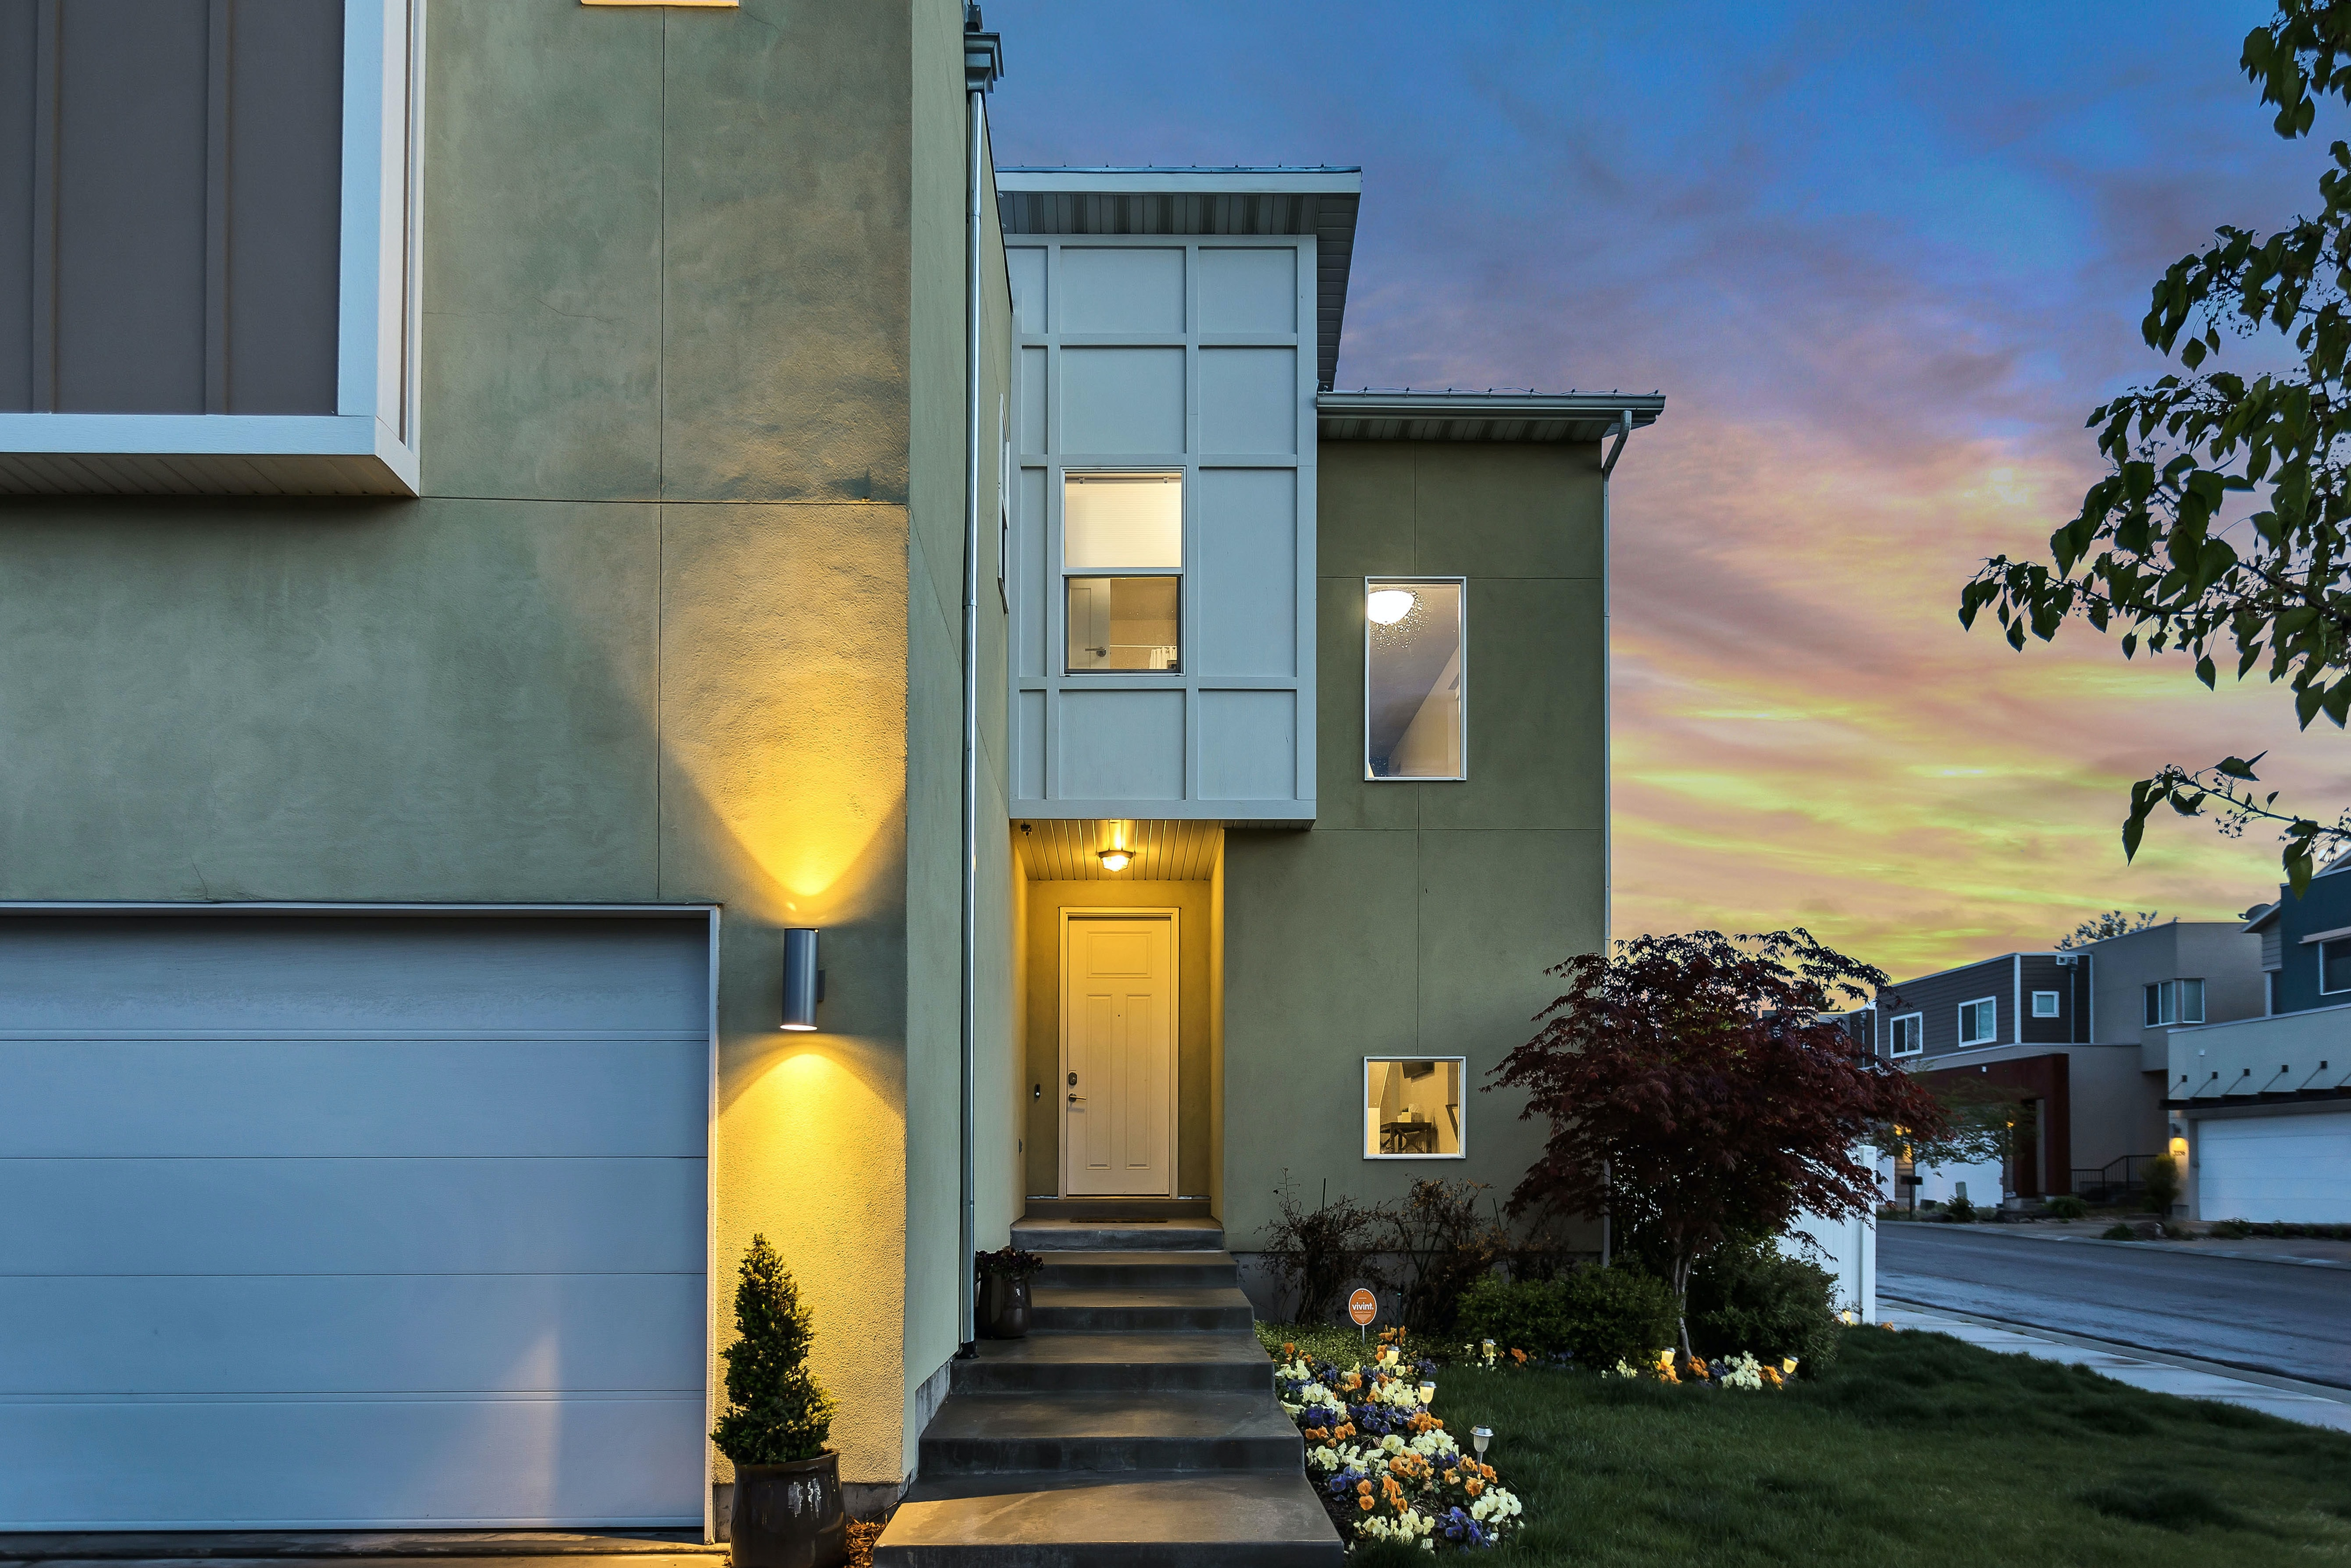

## Introduction

### Problem Statement

White Oak Realty is a real estate company based in Vancouver, Washington DC that would like to expand its business operations by venturing into other cities in Washington. As a junior data scientist at the company, I have been tasked with analysing house sales data in King County and building a model that would predict sale prices.
The product design team wants to start by purchasing existing houses in the area and remodelling them for re-sale as well as developing new houses and properties. Inorder to achieve this they need to know;
1. What features affect house prices most?
2. Other underlying factors to focus on that might increase sale prices.


### Data

This project will use house data from King County,Washington that contains data about the features of the houses located in various parts of the county such as bedrooms, size and location that....
<br>
<a href="https://github.com/AmanyaKaren/dsc-phase-2-project/blob/main/data/kc_house_data.csv">kc_house_data.csv - Link to dataset</a><br>
<a href="https://github.com/AmanyaKaren/dsc-phase-2-project/blob/main/data/column_names.md"> Column_names.md - Column descriptions</a>

In [48]:
#Import libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import scipy.stats as stats

In [49]:
#Load the data
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [50]:
data.shape

(21597, 21)

The dataset contains 21,597 observations of houses and 21 attributes describing these houses.

## Scrub

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [52]:
#Convert columns to correct datatypes
data['date'] = pd.to_datetime(data['date'])

In [53]:
#Check for null values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Looking into the columns with null values
1. Waterfront - the column represents whether or not a house has a view to the waterfront. 0 represents False and 1 represents True.

In [54]:
#Waterfront
data['waterfront'].nunique()

2

In [55]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

0 has a higher counts 

2. View - represents how many times a house has been viewed

In [56]:
data['view'].nunique()

5

In [57]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

O has the highest count and therefore filling the null values with 0 should not have a significant effect on the findings.

3. yr_renovated - represents the year that the house was renovated. This column is not necessary for this analysis and will be dropped

In [58]:
#Apply the changes
data = data.drop('yr_renovated', axis = True)
data = data.fillna(0)
data.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

#### Checking for Outliers

In [59]:
#Descriptive statistics of the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Outiers in 'Price'

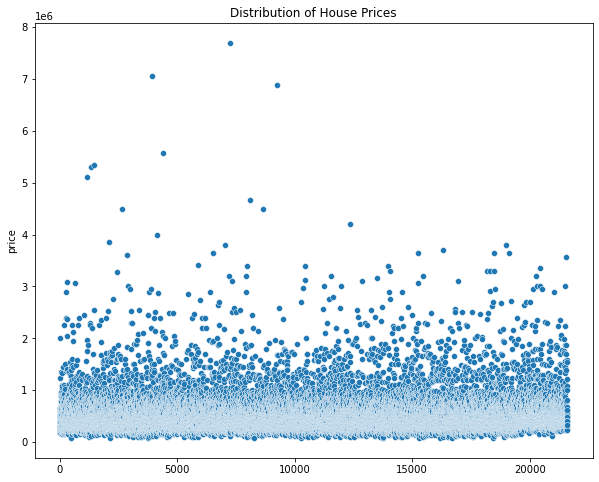

In [60]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(data = data['price'])
ax.set_title('Distribution of House Prices')
plt.show();

The plot above shows presence of some outliers in the price column.This can be handled by removing observations that lie outside of the inter-quantile range.

In [61]:
#calculate iqr
IQR = (1.5 * (data['price'].quantile(.75) )- (data['price'].quantile(.25)))

#removing outliers
data = data.loc[data['price'] <= IQR]

#### Outliers in 'Bedrooms'

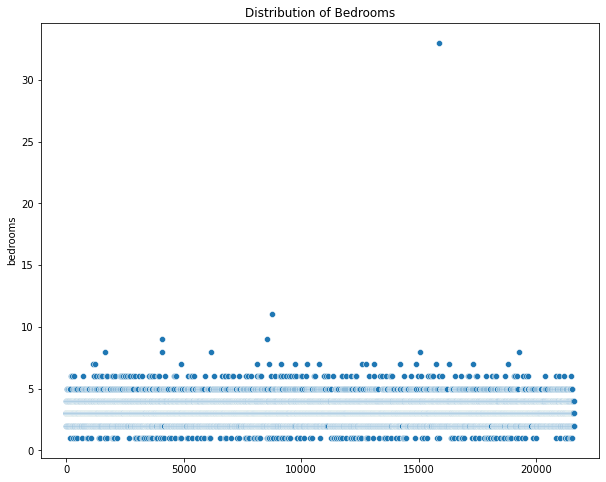

In [62]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(data = data['bedrooms'])
ax.set_title('Distribution of Bedrooms')
plt.show();

The plot shows an obvious outlier - a house with more than 30 bedrooms which is odd given other houses in the same area have a maximum of 15 bedrooms. Because it is just one entry , I opt to remove it from the dataset. 


In [63]:
#house with more than 30 bedrooms
data.loc[data['bedrooms'] > 30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [64]:
#Drop the entry from the dataset 
data = data.loc[data['bedrooms'] < 30]

#Confirm if it has been removed
data.loc[data['bedrooms'] > 30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


### Explore
1.House Features

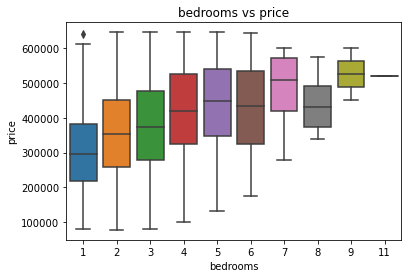

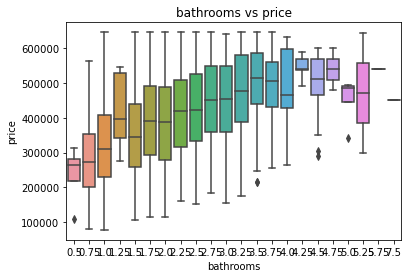

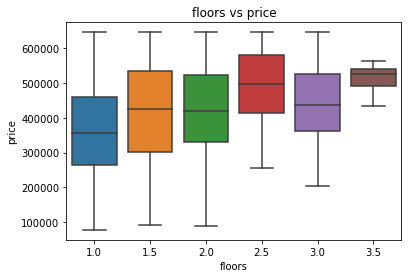

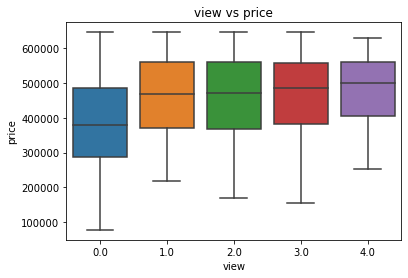

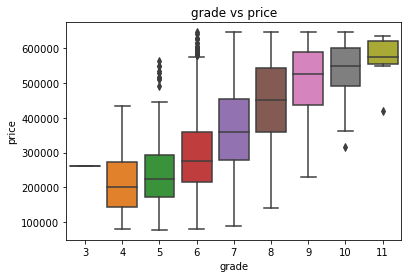

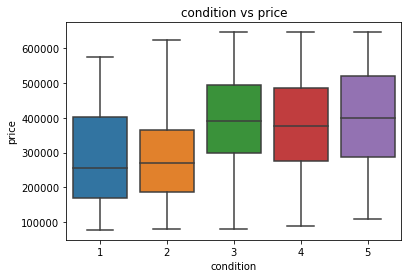

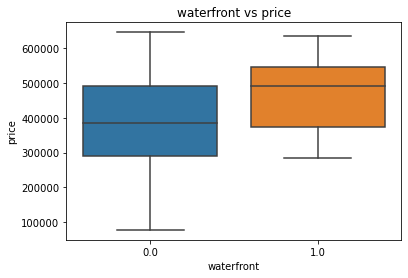

In [65]:
#Categorical features 
categorical = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition', 'waterfront']
 
#Visualizing these features against price
for cat in categorical:
    sns.boxplot(x = data[cat], y = data['price'])
    plt.title(f'{cat} vs price')
    plt.xlabel(f'{cat}')
    plt.ylabel('price')
    plt.show();

#### Observations:
1. Houses with more bedrooms ,bathrooms and floors sell at higher prices.
2. The house's grade affects its selling price - those rated at a high grade sell at higher prices.
3. The number of times a house has been viewed does not seem to have an effect on its selling price
4. Houses with a waterfront sell at higher prices than those without.


#### Checking for Linearity in the Numerical Variables

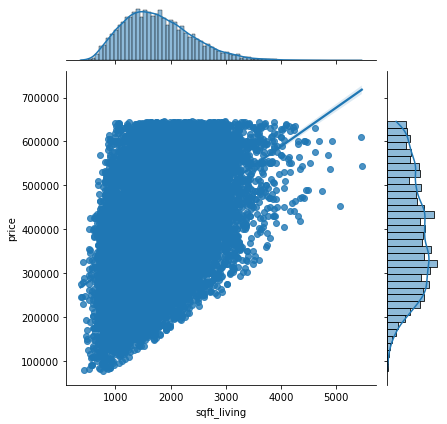

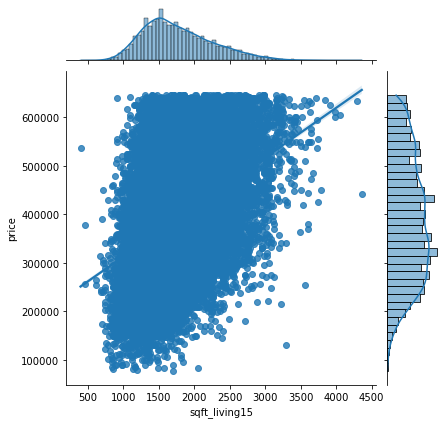

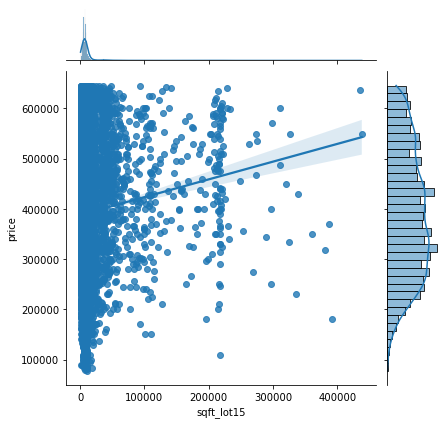

In [66]:
#Numerical features
numericals = ['sqft_living', 'sqft_living15', 'sqft_lot15']

for num in numericals:
    sns.jointplot(data = data , x = num, y = 'price', kind = 'reg')
    plt.xlabel(f'{num}')
    plt.ylabel('price')
    plt.show();

#### Observations:
1. sqft_living and sqft_above seem to have the most linear relationship with price
2. sqft_lot appears to have the least linear relationship with price.

#### Checking for multicolinearity

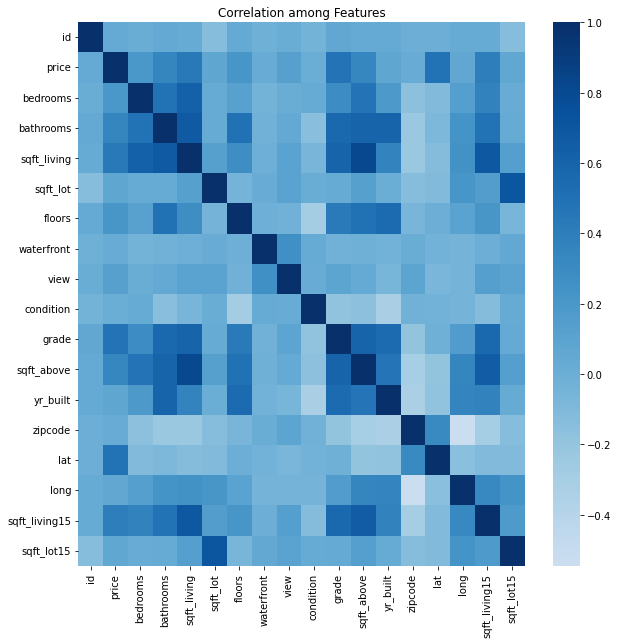

In [67]:
#Plot a heatmap to visualize correlation between features
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(data.corr(), center = 0, cmap = 'Blues')
ax.set_title('Correlation among Features')
plt.show;

In [68]:
data_corr = data.corr()
data_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.038010,0.014617,0.042755,0.029979,-0.130219,0.036339,-0.017622,0.014106,-0.039385,0.063147,0.034741,0.039449,-0.007846,0.002618,0.023692,0.022880,-0.139381
price,0.038010,1.000000,0.202892,0.349684,0.441756,0.070718,0.219300,0.021851,0.123742,0.008025,0.477106,0.340965,0.072114,0.018118,0.484591,0.058749,0.400589,0.066631
bedrooms,0.014617,0.202892,1.000000,0.482271,0.618538,0.025572,0.117867,-0.038889,0.013824,0.023584,0.286341,0.477378,0.184701,-0.161940,-0.103472,0.135243,0.367050,0.020263
bathrooms,0.042755,0.349684,0.482271,1.000000,0.675779,0.024645,0.497907,-0.027616,0.041944,-0.147127,0.569777,0.598602,0.599085,-0.226609,-0.092664,0.227185,0.490885,0.024935
sqft_living,0.029979,0.441756,0.618538,0.675779,1.000000,0.129800,0.279297,-0.013048,0.111458,-0.065515,0.597293,0.816190,0.365537,-0.226443,-0.125379,0.248792,0.687787,0.141307
sqft_lot,-0.130219,0.070718,0.025572,0.024645,0.129800,1.000000,-0.051765,0.021606,0.104582,0.014324,0.032754,0.127770,0.006137,-0.130438,-0.104294,0.213070,0.153361,0.707125
floors,0.036339,0.219300,0.117867,0.497907,0.279297,-0.051765,1.000000,-0.013424,-0.027761,-0.281082,0.428755,0.497657,0.548470,-0.065806,-0.007742,0.107205,0.215068,-0.057090
waterfront,-0.017622,0.021851,-0.038889,-0.027616,-0.013048,0.021606,-0.013424,1.000000,0.262206,0.022000,-0.021449,-0.016470,-0.036289,0.011868,-0.033749,-0.054771,-0.003564,0.046521
view,0.014106,0.123742,0.013824,0.041944,0.111458,0.104582,-0.027761,0.262206,1.000000,0.021603,0.076795,0.038240,-0.056892,0.076312,-0.069453,-0.048493,0.137525,0.105912
condition,-0.039385,0.008025,0.023584,-0.147127,-0.065515,0.014324,-0.281082,0.022000,0.021603,1.000000,-0.178654,-0.163607,-0.316980,-0.026649,-0.037318,-0.054908,-0.127674,0.025565


In [69]:
#Variables with the highest correlation
data_corr[(data_corr > 0.75) & (data_corr < 1) ]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81619,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Both the heatmap and correlation table show a high co-linearity between sqft_above and sqft_living.
To minimize multicollinearity, I will drop sqft_above. The column contains information on the living space in the house excluding the basement.This should not negatively affect the model because  'sqft_living' also contains information about the size of the house excluding the basement and garage areas.

In [70]:
#Dropping the column
data = data.drop(['sqft_above'], axis = 1)

#### Dealing with Categorical Variables
1. One Hot Encoding

In [71]:
#A function that takes in a dataframe and category and returns encoded data

def ohe(df, variable):
    df_ohe = df[variable].astype('category')
    df_ohe = pd.get_dummies(df_ohe, prefix = variable, drop_first = True)
    df = pd.concat([df,df_ohe], axis=1)
    df = df.drop(variable, axis = 1)
    return df


#Apply function to select categorical variables
data = ohe(data,'condition')

### Model

#### 1. Baseline Model

In [72]:
#Dropping unecessary columns
preprocessed_data = data.drop(['id','date', 'lat', 'long', 'zipcode','sqft_basement'], axis = 1)


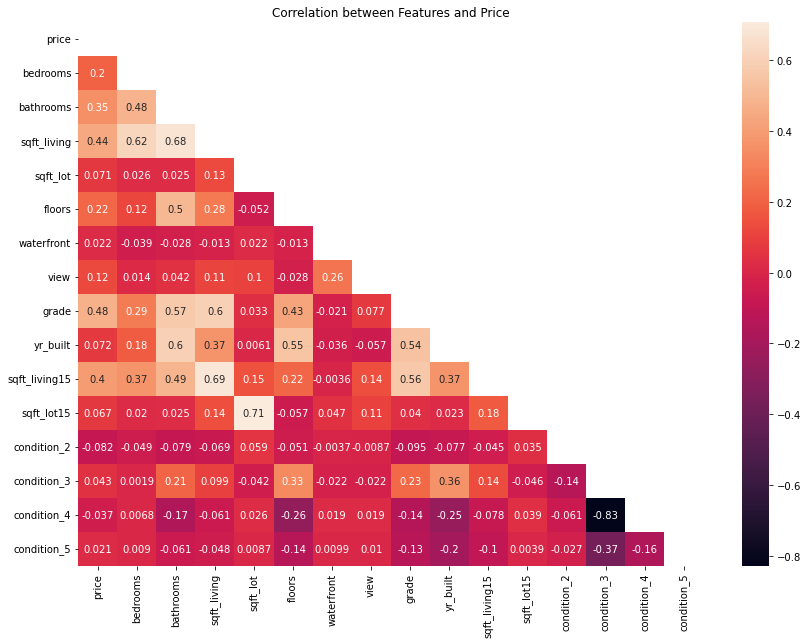

In [73]:
#Using a heatmap to find the feature with the strongest linear relationship with price
preprocessed_data_corr = preprocessed_data.corr()
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(data = preprocessed_data_corr, 
            mask=np.triu(np.ones_like(preprocessed_data_corr, dtype=bool)),
            ax = ax,
            annot = True)
ax.set_title('Correlation between Features and Price')
plt.show();

The heatmap shows that:
1. Grade has the strongest linear relationship with price. Grade represents the overall grade given to the housing unit, based on King County grading system.
2. sqft_living has the second strongest linear relationship with price - represents the footage of the home.
3. sqft_living15 has the third highest strongest linear relationship with price - The square footage of interior housing living space for the nearest 15 neighbors.

### Simple Linear regression

#### Splitting the data to Train and Test
Using a test size of 20% and a train size of 80%

In [74]:
#Divide the data into the target and features
#Target
y = preprocessed_data['price']

#using the 3 variables with the strongest linear relationship with price
X = preprocessed_data[['grade', 'sqft_living', 'sqft_living15', 'bathrooms']]

#Splitting into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,  y, random_state = 42, test_size = 0.2)


In [75]:
#Building the model
X_int = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train, X_int).fit()
summary = baseline_model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     1208.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:07:03   Log-Likelihood:            -1.6888e+05
No. Observations:               12982   AIC:                         3.378e+05
Df Residuals:                   12977   BIC:                         3.378e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.146e+04   8738.310     -7.033      0.000   -7.86e+04   -4.43e+04
grade          4.727e+04   1512.386     31.252      0.000    4.43e+04    5.02e+04
sqft_living      38.6678      2.477     15.610      0.000      33.812      43.523
sqft_living15    24.6255      2.738      8.996      0.000      19.260      29.991
bathrooms     -1640.6312   2021.433     -0.812      0.417   -5602.936    2321.674
==============================================================================
Omnibus:                      826.912   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.416
Skew:                           0.267   Prob(JB):                     2.29e-91
Kurtosis:                       2.302   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model explains about 27% of the variance

#### RMSE Scores

In [76]:
#Fitting a simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# getting rmse
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")

rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[110645.25728277 108556.85142464 107645.78941816 105280.95467615
 106270.76498576 108005.87619081 107949.73121074 109811.69423633
 107384.38470365 109006.09966271]
108055.74037917264
1498.710854616826


The mean error can be interpreted to mean that the prices predicted using this model with be less or more by about $ 108,055.74 with a standard deviation of 1498.71

#### 2. Model 2

Building a second model with more modifications to the data to try and improve on mode performance

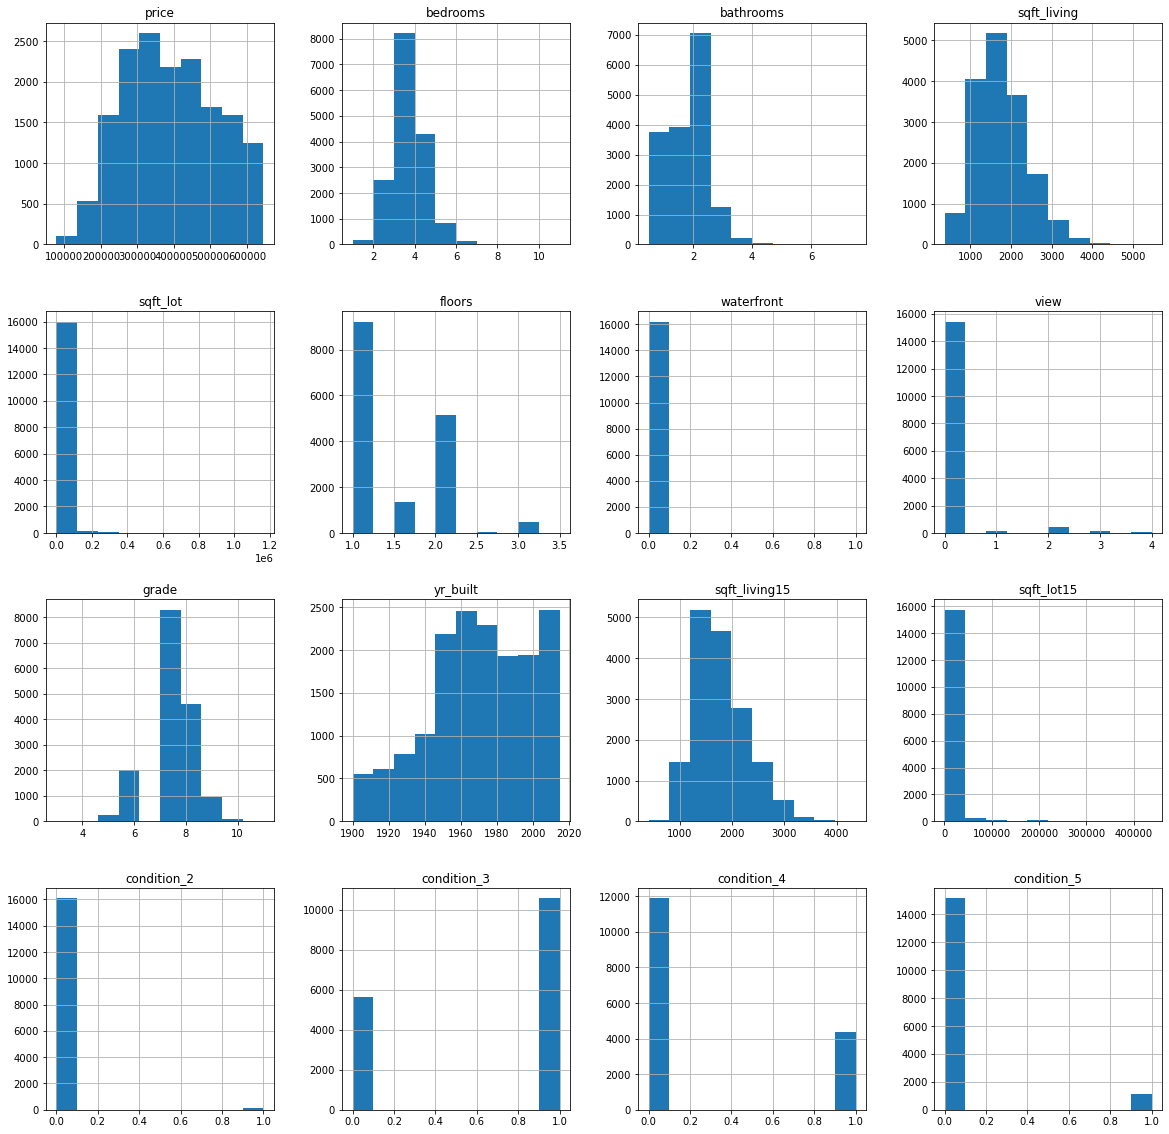

In [77]:
#plot a histogram to show the distribution of features
preprocessed_data.hist(figsize = (20,20))
plt.show();

In [78]:
#Performing one hot encoding on the rest of the catgorical variables
categoricals =  ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'waterfront']
preprocessed_ohe = ohe(preprocessed_data, categoricals )
preprocessed_ohe.head()

,price,sqft_living,sqft_lot,yr_built,sqft_living15,sqft_lot15,condition_2,condition_3,condition_4,condition_5,...,view_4.0,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,waterfront_1.0
0,221900.0,1180,5650,1955,1340,5650,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,1951,1690,7639,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,770,10000,1933,2720,8062,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,1960,5000,1965,1360,5000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,1680,8080,1987,1800,7503,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
#log transformations on continuous variables
continuous = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15','price']

preprocessed_cont = preprocessed_data[continuous]
log_names = [f'{column}_log' for column in preprocessed_cont.columns]

preprocessed_log = np.log(preprocessed_cont)
preprocessed_log.columns = log_names

# normalizing the variables
def normalize(variable):
    return (variable - variable.mean()) / variable.std()

preprocessed_log_normalized = preprocessed_log.apply(normalize)

preprocessed_2 = pd.concat([preprocessed_log_normalized, preprocessed_ohe], axis=1)

In [80]:
#Splitting into train and test sets
X_2 = preprocessed_2.drop(['price_log'], axis = 1)
y_2 = preprocessed_2['price_log']

X_train,X_test,y_train,y_test = train_test_split(X_2,y_2, random_state = 42, test_size = 0.2)

In [81]:
#Fitting the second model
X_int = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_int).fit()
summary = model_2.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     5584.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:07:08   Log-Likelihood:                 3034.7
No. Observations:               12982   AIC:                            -5945.
Df Residuals:                   12920   BIC:                            -5482.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.9377      0.297     -9.894      0.000      -3.520      -2.356
sqft_living_log       0.0708      0.010      6.907      0.000       0.051       0.091
sqft_lot_log          0.0012      0.005      0.222      0.824      -0.009       0.011
sqft_living15_log     0.1091      0.011      9.682      0.000       0.087       0.131
sqft_lot15_log       -0.0164      0.005     -3.064      0.002      -0.027      -0.006
price              7.597e-06   1.72e-08    441.720      0.000    7.56e-06    7.63e-06
sqft_living       -9.239e-05   1.55e-05     -5.942      0.000      -0.000   -6.19e-05
sqft_lot           1.597e-07   8.76e-08      1.823      0.068    -1.2e-08    3.31e-07
yr_built              0.0001      0.000      1.193      0.233   -7.85e-05       0.000
sqft_living15        -0.0002   2.32e-05     -8.625      0.000      -0.000      -0.000
sqft_lot15         2.099e-07   1.31e-07      1.600      0.110   -4.73e-08    4.67e-07
condition_2           0.0199      0.043      0.462      0.644      -0.064       0.104
condition_3           0.1517      0.040      3.822      0.000       0.074       0.230
condition_4           0.1520      0.040      3.826      0.000       0.074       0.230
condition_5           0.1529      0.040      3.811      0.000       0.074       0.231
bedrooms_2           -0.0083      0.017     -0.475      0.635      -0.042       0.026
bedrooms_3           -0.0344      0.018     -1.928      0.054      -0.069       0.001
bedrooms_4           -0.0293      0.018     -1.598      0.110      -0.065       0.007
bedrooms_5           -0.0269      0.020     -1.363      0.173      -0.066       0.012
bedrooms_6           -0.0231      0.027     -0.862      0.389      -0.076       0.029
bedrooms_7           -0.0531      0.054     -0.983      0.326      -0.159       0.053
bedrooms_8            0.0403      0.113      0.356      0.722      -0.181       0.262
bedrooms_9           -0.2345      0.201     -1.165      0.244      -0.629       0.160
bedrooms_11          -0.0623      0.193     -0.322      0.747      -0.441       0.317
bathrooms_0.75        0.2254      0.100      2.254      0.024       0.029       0.422
bathrooms_1.0         0.1686      0.096      1.752      0.080      -0.020       0.357
bathrooms_1.25        0.2261      0.124      1.820      0.069      -0.017       0.469
bathrooms_1.5         0.1800      0.096      1.867      0.062      -0.009       0.369
bathrooms_1.75        0.1961      0.096      2.035      0.042       0.007       0.385
bathrooms_2.0         0.1928      0.096      2.000      0.046       0.004       0.382
bathrooms_2.25        0.1947      0.096      2.019      0.044       0.006       0.384
bathrooms_2.5         0.2009      0.096      2.083      0.037       0.012       0.390
bathrooms_2.75        0.1939      0.097      2.004      0.045       0.004

The second model has performed significantly better than the baseline model. The r-squared score indicates that the model explains for 96.3 % of the variance.

### 3. Final Model
The final model will employ feature selection to find the best features for the model based on their p-values

In [82]:
#Features used in model 2
best_features = list(X_2.columns)
p_max = 1

#Remove p_values higher than 0.05 from each model
while (len(best_features) > 0):
    p_values = []
    
    X_new = X_2[best_features]
    X_new = sm.add_constant(X_new)
    model = sm.OLS(y,X_new).fit()
    
    p = pd.Series(model.pvalues.values[1:],index = best_features)      
    p_max = max(p)
    feature_pmax = p.idxmax()
    
    if p_max > 0.05:
        best_features.remove(feature_pmax)
    else:
        break
best_features

['sqft_lot_log',
 'sqft_living15_log',
 'price',
 'bedrooms_2',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1.25',
 'bathrooms_1.75',
 'bathrooms_2.25',
 'bathrooms_2.75',
 'bathrooms_3.25']

#### Running the Final Model using only the best performing features

In [83]:
X_final = preprocessed_2[best_features]
y_final = preprocessed_2['price']

#Splitting into train and test sets 
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final, random_state = 42, test_size = 0.2)

#fitting the model
X_int = sm.add_constant(X_train)
final_model = sm.OLS(y_train, X_int).fit()
summary = final_model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.145e+33
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:07:13   Log-Likelihood:             2.8381e+05
No. Observations:               12982   AIC:                        -5.676e+05
Df Residuals:                   12970   BIC:                        -5.675e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.019e-10    2.5e-12     80.780      0.000    1.97e-10    2.07e-10
sqft_lot_log        8.64e-12   7.39e-13     11.690      0.000    7.19e-12    1.01e-11
sqft_living15_log          0   8.44e-13          0      1.000   -1.65e-12    1.65e-12
price                 1.0000   5.98e-18   1.67e+17      0.000       1.000       1.000
bedrooms_2        -5.639e-11   2.05e-12    -27.495      0.000   -6.04e-11   -5.24e-11
bedrooms_4        -3.274e-11   1.69e-12    -19.419      0.000    -3.6e-11   -2.94e-11
bedrooms_5         6.003e-11   3.21e-12     18.699      0.000    5.37e-11    6.63e-11
bathrooms_1.25    -2.183e-10   3.17e-11     -6.891      0.000    -2.8e-10   -1.56e-10
bathrooms_1.75    -4.115e-11   1.92e-12    -21.490      0.000   -4.49e-11   -3.74e-11
bathrooms_2.25    -1.091e-10   2.35e-12    -46.415      0.000   -1.14e-10   -1.05e-10
bathrooms_2.75     9.095e-11   3.59e-12     25.358      0.000    8.39e-11     9.8e-11
bathrooms_3.25    -2.183e-11    6.4e-12     -3.410      0.001   -3.44e-11   -9.28e-12
==============================================================================
Omnibus:                       94.633   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.538
Skew:                           0.209   Prob(JB):                     1.09e-21
Kurtosis:                       3.059   Cond. No.                     1.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The final model performed very well after dropping features with high p_values which in this case were insignificant to the model.


#### Checking for Normality

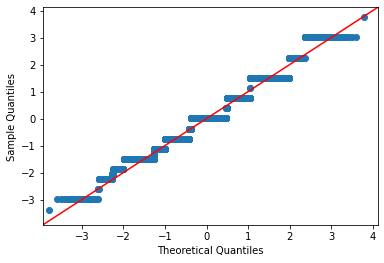

In [85]:
fig = sm.graphics.qqplot(final_model.resid, dist = stats.norm, line='45', fit=True)

### Conclusion

#### Findings and Recommendations

1. Bedrooms are bathrooms affect house sale prices - the findings show that houses with atleast 4 bedrooms and two bathrooms sell at significantly higher prices than those with less. My recommendation would be to focus on acquiring houses with 4 or more bedrooms and atleast 2 bathrooms.


2. The King County house grading system is key to a a house's selling price. There is a clear linear relationshp between the grade and price and as the grade went up so did the selling price. Although exact determinants of this grade are not clear in the study, it is very significant.My recommendation would be to look into the grading system and to choose houses with a grade of atleast 7. 

3. Waterfront feature - Houses without a waterfront sold at lower prices than those with one. My recommendation would be to acquire houses with a close proximity to a waterfront inorder to maximize on the demand for this feature.

4. The overall living size area of the house i.e excluding the basement is very significant to the price. The study show a linear realtionship between the size of the living space and price while the size of the basement played a very insignificant role to the houses' selling price. My recommendation would therefore be to acquire houses with a relatively larger living space as compared to the basement.